# Homework 2: Linear Classification

In [59]:
# import packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Exploratory Data Analysis

In [60]:
# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()

# Create a DataFrame with the data and feature names
breast_cancer_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

In [61]:
breast_cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
# Summary statistics
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [63]:
breast_cancer_df.shape

(569, 30)

In [64]:
# Check for missing values
breast_cancer_df.isnull().sum()
# There are no empty values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

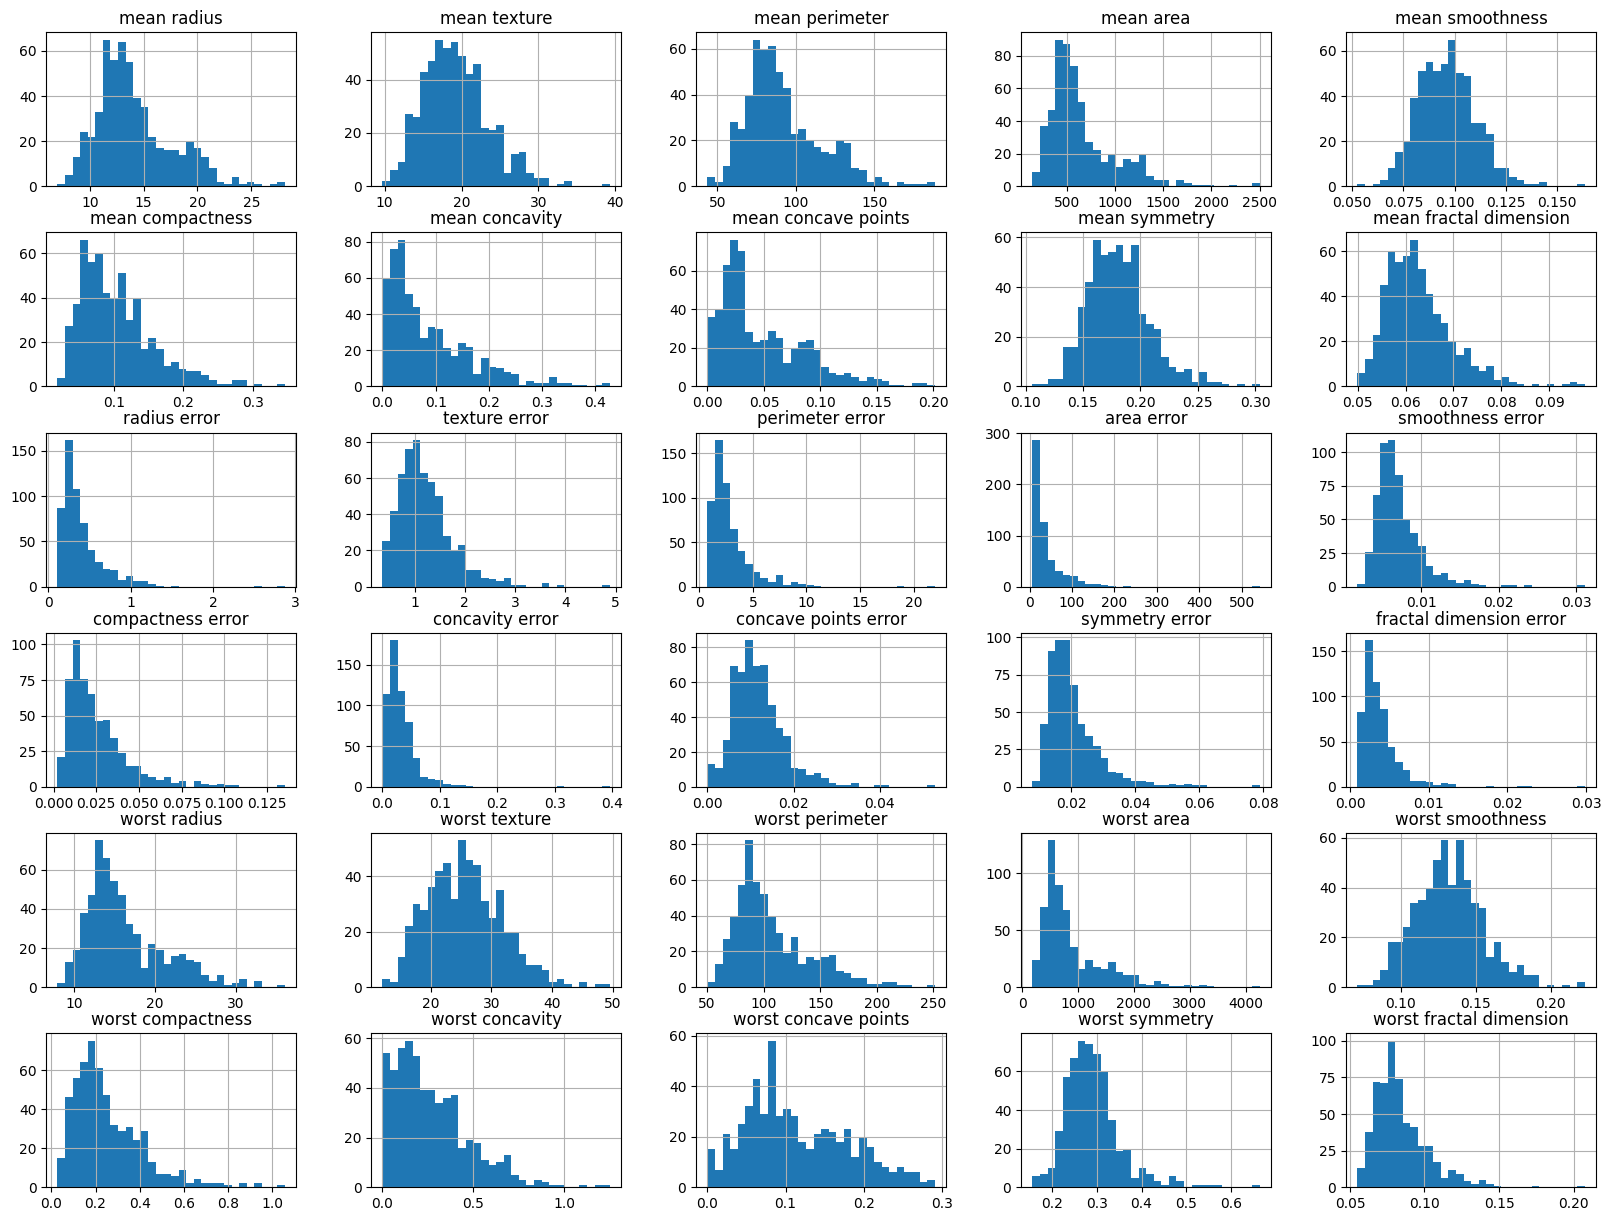

In [65]:
# Histograms for all features
breast_cancer_df.hist(bins=30, figsize=(20, 15))
plt.show()


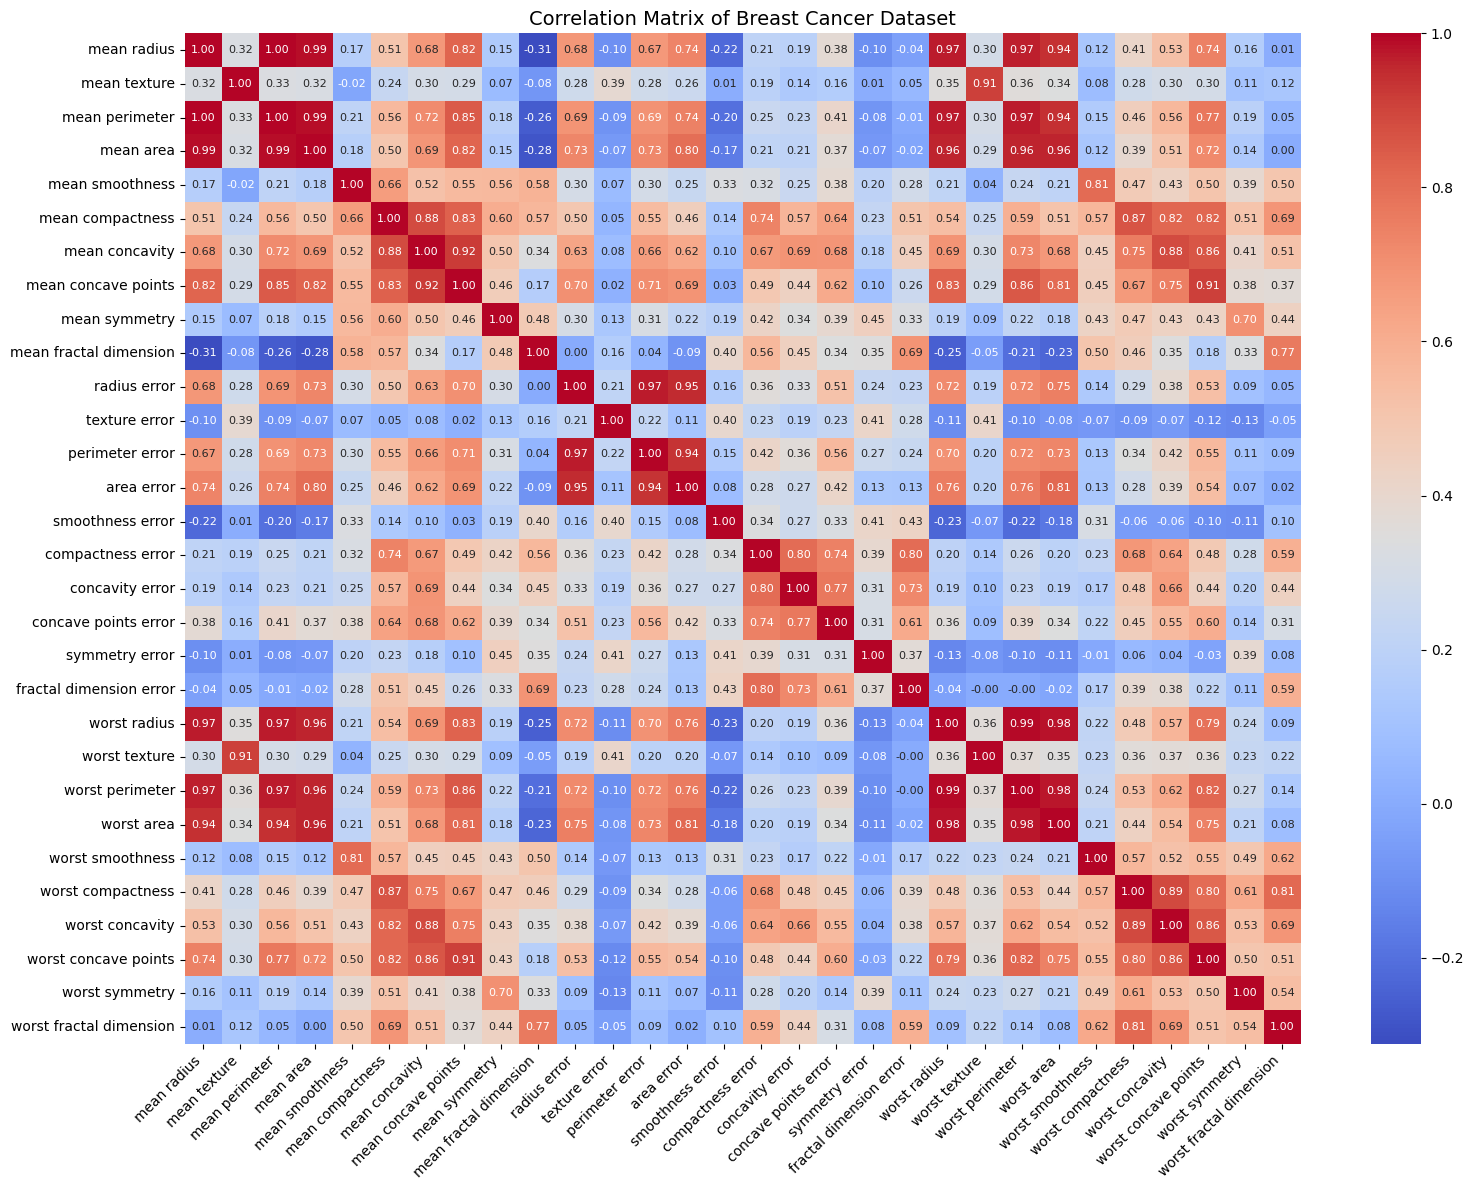

In [66]:
# Correlation matrix
corr_matrix = breast_cancer_df.corr()

# Plotting the heatmap with adjustments for better readability
plt.figure(figsize=(16, 12))  # Increase the figure size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})  # Set smaller font for annotations
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)  # Adjust font size for y-axis labels
plt.title('Correlation Matrix of Breast Cancer Dataset', fontsize=14)  # Add a title for context
plt.tight_layout()  # Ensure everything fits within the plot area
plt.show()


### Exploratory Data Analysis Conclusions:
The breast cancer data set is easy to work with because the shape is (569, 30), which means we have a decent amount of rows and features to have a model that can learn from the data. Another positive, the dataset has no holes or missing values. The only thing that has to be done is to standardize the values of the features. For example: mean_radius = 17.99 while mean_compactness = 0.188 and mean_perimeter = 122.80, conceptually these numbers are so different that on a scale one feature may outweigh the others just because it is numerically larger. The process of standardization transofrms features to have a mean of 0 and a standard deviation of 1. It makes it a lot easier for the model to learn becuse it assumes that all features should equally contribute to the model. It does not change their actual weight as the model itself will learn those weights or importance through  `coefficients`. We also have to make sure that we can separate X (training features) and y (target label).



In [67]:
# perform standard scaling

# Extract features (X) and target (y)
X = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
y = breast_cancer_data.target

# Scaler object
scaler = StandardScaler()

# Scale
X_scaled = scaler.fit_transform(X)
print("Data scaled...")

Data scaled...


In [68]:
# Prepare data for modeling. Train test split and adding bias vector

# Convert labels from 0/1 -> -1/1 for binary classification
y = np.where(y == 0, -1, 1)

# Add a column the bias vector to X
X_scaled = np.hstack([np.ones((X.shape[0], 1)), X])

# Split the data set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data ready ...")

Data ready ...


### Modelling
1. Implement linear regression to find the initial weights (w) for hte classifier
2. After initializing the weights with linear regression, we will use Pocket Algorithm (PLA) to refine the weights by adjusting for any missclassifcations.

This is called Pseudo-Inverse (Linear Regression): We use Linear Regression to initialize our w vector, and not randomly, to start with the best estimates of w based on minimizing the least squared errors. Essentially just giving us a better starting point.

In [69]:
# Linear Regression using built in psuedo inverse to calculate best estimates for `w`
def linear_regression(X, y):
    X_pseudo_inverse = np.linalg.pinv(X)  # Compute the pseudo-inverse of X
    w = np.dot(X_pseudo_inverse, y)  # w = X_pseudo_inverse * y
    return w

print("Pseudo-Inverse Linear Regression Declared ...")

Pseudo-Inverse Linear Regression Declared ...


In [74]:
def pocket_algorithm(X, y, w_init, max_iterations=1000):
    w = w_init.copy()  # Start with the initial weights from linear regression
    pocket_w = w_init.copy()  # Store the best weights in the "pocket"
    best_error_count = np.inf  # Start with an infinitely large error count

    for iteration in range(max_iterations):
        misclassified_points = 0

        for i in range(len(X)):
            # Check if X and y are pandas DataFrame/Series or NumPy arrays
            if isinstance(X, pd.DataFrame):
                x_i = X.iloc[i]
            else:
                x_i = X[i]

            if isinstance(y, pd.Series):
                y_i = y.iloc[i]
            else:
                y_i = y[i]
            
            # Predict using the current weights (use sign to classify)
            prediction = np.sign(np.dot(x_i, w))

            # If the point is misclassified
            if prediction != y_i:
                misclassified_points += 1
                # Update the weights based on the misclassified point
                w = w + y_i * x_i

        # If this set of weights has fewer misclassified points, update the pocket
        if misclassified_points < best_error_count:
            pocket_w = w.copy()  # Save these weights in the pocket
            best_error_count = misclassified_points

        # Break if no misclassifications
        if misclassified_points == 0:
            break

    return pocket_w  # Return the best weights found (in the pocket)


print("PLA Declared ...")

PLA Declared ...


### Usage

In [71]:
# Step 1 Initialize weights
w_init = linear_regression(X_train, y_train)
print("Weights initilized via linear regression")

# Step 2: Run PLA
pocket_w = pocket_algorithm(X_train, y_train, w_init)
print("W improved by PLA ...")

# Print the final pocket weights
print("Final pocket weights:", pocket_w)


Weights initilized via linear regression
W improved by PLA ...
Final pocket weights: mean radius                12955.408264
mean texture              -13327.487155
mean perimeter             47426.346624
mean area                   2406.596771
mean smoothness              -73.838486
mean compactness            -890.886485
mean concavity             -1405.310941
mean concave points         -550.861225
mean symmetry               -111.696093
mean fractal dimension        27.655132
radius error                 210.845837
texture error                 14.093129
perimeter error            -3448.329367
area error                -10110.343710
smoothness error             -53.535509
compactness error           -223.935045
concavity error             -317.420893
concave points error        -100.957707
symmetry error               -49.347013
fractal dimension error      -51.376523
worst radius               12909.606909
worst texture             -26672.422455
worst perimeter            11678.42

### Results

===== Mean Squared Error (MSE) Comparison =====
Linear Regression - MSE (Ein): 0.20640762653964076, MSE (Eout): 0.25643545003623563
Pocket PLA - MSE (Ein): 0.3868131868131868, MSE (Eout): 0.21052631578947367

===== Accuracy Comparison =====
Linear Regression - Accuracy (Ein): 0.9626373626373627, Accuracy (Eout): 0.956140350877193
Pocket PLA - Accuracy (Ein): 0.9032967032967033, Accuracy (Eout): 0.9473684210526315



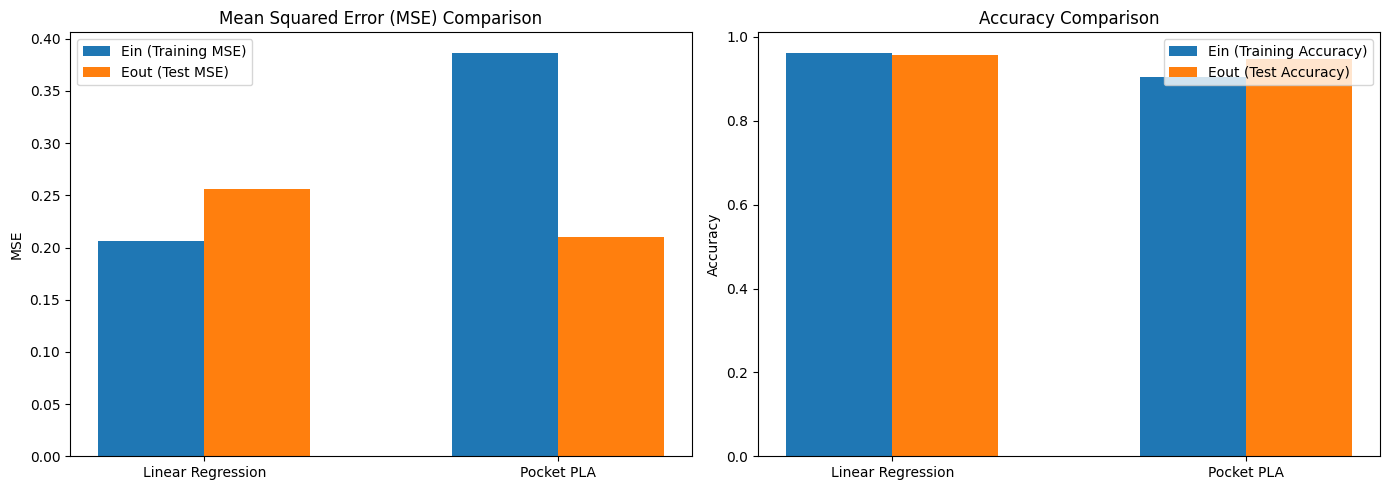

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score

# Assuming X_train, y_train, X_test, y_test, and pocket_w are already defined
# Step 1: Train a linear regression model from scratch using pseudoinverse
X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]  # Add bias term to X_train
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]     # Add bias term to X_test

# Compute weights using the pseudoinverse formula for linear regression: w = (X^T X)^-1 X^T y
w_linear_reg = np.linalg.pinv(X_train_bias.T @ X_train_bias) @ X_train_bias.T @ y_train

# Step 2: Make predictions using the new linear regression model
y_train_pred_lr = np.dot(X_train_bias, w_linear_reg)  # Predictions on the training set
y_test_pred_lr = np.dot(X_test_bias, w_linear_reg)    # Predictions on the test set

# Step 3: Ensure pocket_w includes a bias term
pocket_w_with_bias = np.concatenate(([0], pocket_w))  # Add a bias weight (e.g., 0)

# Make predictions using the pocket algorithm weights (pocket_w_with_bias)
y_train_pred_pocket = np.sign(np.dot(X_train_bias, pocket_w_with_bias))  # Predictions on the training set
y_test_pred_pocket = np.sign(np.dot(X_test_bias, pocket_w_with_bias))    # Predictions on the test set

# Step 4: Evaluate both models
# 4a: Mean Squared Error (if the target values are continuous)
Ein_lr = mean_squared_error(y_train, y_train_pred_lr)  # In-sample error for linear regression
Eout_lr = mean_squared_error(y_test, y_test_pred_lr)   # Out-of-sample error for linear regression

Ein_pocket = mean_squared_error(y_train, y_train_pred_pocket)  # In-sample error for pocket algorithm
Eout_pocket = mean_squared_error(y_test, y_test_pred_pocket)   # Out-of-sample error for pocket algorithm

# 4b: Accuracy (if the target values are discrete -1/1 for classification)
y_train_lr_class = np.sign(y_train_pred_lr)
y_test_lr_class = np.sign(y_test_pred_lr)

Ein_lr_acc = accuracy_score(y_train, y_train_lr_class)  # In-sample accuracy for linear regression
Eout_lr_acc = accuracy_score(y_test, y_test_lr_class)   # Out-of-sample accuracy for linear regression

Ein_pocket_acc = accuracy_score(y_train, y_train_pred_pocket)  # In-sample accuracy for pocket algorithm
Eout_pocket_acc = accuracy_score(y_test, y_test_pred_pocket)   # Out-of-sample accuracy for pocket algorithm

# Printing the results with clear distinction between MSE and Accuracy
print("===== Mean Squared Error (MSE) Comparison =====")
print(f"Linear Regression - MSE (Ein): {Ein_lr}, MSE (Eout): {Eout_lr}")
print(f"Pocket PLA - MSE (Ein): {Ein_pocket}, MSE (Eout): {Eout_pocket}\n")

print("===== Accuracy Comparison =====")
print(f"Linear Regression - Accuracy (Ein): {Ein_lr_acc}, Accuracy (Eout): {Eout_lr_acc}")
print(f"Pocket PLA - Accuracy (Ein): {Ein_pocket_acc}, Accuracy (Eout): {Eout_pocket_acc}\n")

# Step 5: Plotting the results for visual comparison
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# MSE Plot (for regression comparison)
width = 0.3  # width of the bars
models = ['Linear Regression', 'Pocket PLA']
Ein_mse_values = [Ein_lr, Ein_pocket]
Eout_mse_values = [Eout_lr, Eout_pocket]

# Side-by-side bars for MSE
axs[0].bar(np.arange(len(models)) - width/2, Ein_mse_values, width=width, label='Ein (Training MSE)')
axs[0].bar(np.arange(len(models)) + width/2, Eout_mse_values, width=width, label='Eout (Test MSE)')
axs[0].set_title('Mean Squared Error (MSE) Comparison')
axs[0].set_ylabel('MSE')
axs[0].set_xticks(np.arange(len(models)))
axs[0].set_xticklabels(models)
axs[0].legend()

# Accuracy Plot (for classification comparison)
Ein_acc_values = [Ein_lr_acc, Ein_pocket_acc]
Eout_acc_values = [Eout_lr_acc, Eout_pocket_acc]

# Side-by-side bars for Accuracy
axs[1].bar(np.arange(len(models)) - width/2, Ein_acc_values, width=width, label='Ein (Training Accuracy)')
axs[1].bar(np.arange(len(models)) + width/2, Eout_acc_values, width=width, label='Eout (Test Accuracy)')
axs[1].set_title('Accuracy Comparison')
axs[1].set_ylabel('Accuracy')
axs[1].set_xticks(np.arange(len(models)))
axs[1].set_xticklabels(models)
axs[1].legend()

plt.tight_layout()
plt.show()
